### Study of the writer's evolution based on his books over the years.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from bow_model import BagOfWords

In [23]:
df = pd.read_csv('data.csv')
# df = df[df['authors'] == 'Agatha Christie']
df = df.dropna()
df[['authors','description','published_year']].tail()

,authors,description,published_year
6790,Miguel Serrano,"Miguel Serrano, a Chilean diplomat and writer ...",1997.0
6793,Kazuko Tadano,This volume was inspired by young women workin...,2003.0
6796,村上真美子,This is a student's guide to the expression of...,2002.0
6805,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,This collection of the timeless teachings of o...,1999.0
6809,Helena Grice;Tim Woods,This is a jubilant and rewarding collection of...,1998.0


In [27]:
all_texts = df["description"].astype(str).tolist()
all_metadata = [{'author': str(row["authors"]),'year': int(row['published_year'])} for _, row in df.iterrows() ]

In [28]:
bow_model = BagOfWords()
bow_matrix = bow_model.fit_transform(all_texts)


Starting BoW process (use_bigrams=False)...
Step 1: Cleaning and tokenizing texts...
____ Processed 1000 texts...
____ Processed 2000 texts...
____ Initial token count (unique): 19971
Step 2: Building final vocabulary...
____ Postprocessing: Min Freq=5, Stopwords=Yes, Stemming=Yes
____ Words after frequency filter: 4020
____ Words after stopword filter: 3895
____ Unique stemmed words: 2733
____ Final vocabulary size: 2733
Step 3: Creating BoW matrix...
____ Vectorized 1000 texts...
____ Vectorized 2000 texts...
____ BoW matrix created. Shape: (2182, 2733)

BoW process finished.
____ Final Matrix Shape: (2182, 2733)
____ Total time: 1.49 seconds


In [29]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(bow_matrix)

C:\Users\duina\AppData\Local\Temp\ipykernel_12420\3087798626.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


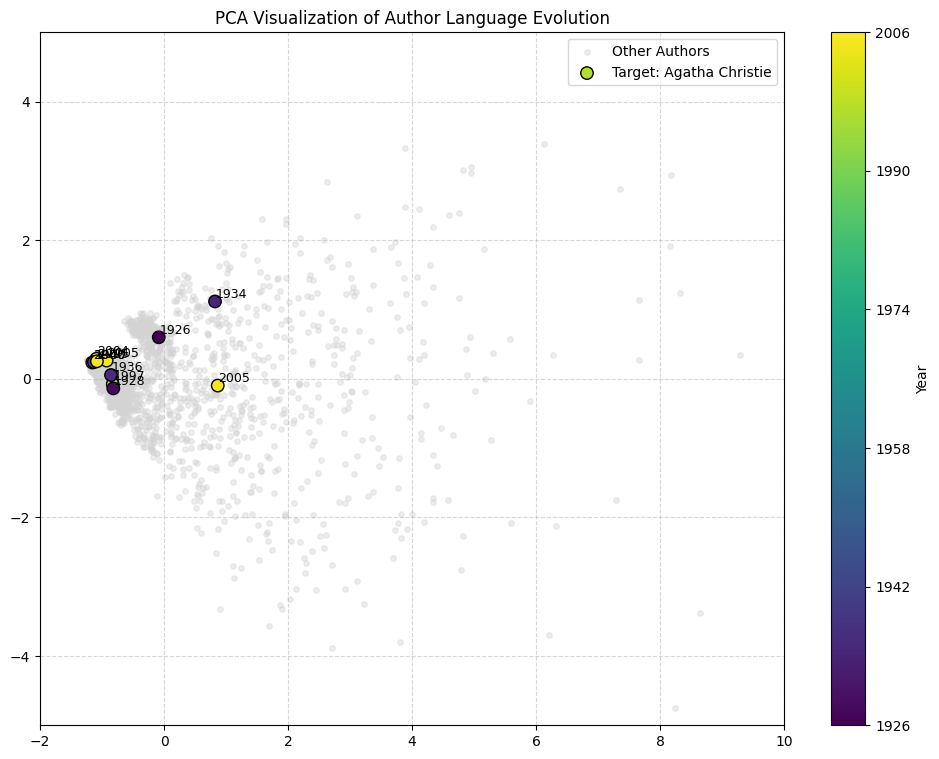

In [34]:
target_author = "Agatha Christie" 

plt.figure(figsize=(12, 9))

target_author = str(target_author)
target_indices = [i for i, meta in enumerate(all_metadata) if meta['author'] == target_author]
background_indices = [i for i, meta in enumerate(all_metadata) if meta['author'] != target_author]

if background_indices:
    plt.scatter(X_pca[background_indices, 0], X_pca[background_indices, 1],
                c='lightgray', alpha=0.4, s=15, label='Other Authors')

if target_indices:
    target_data = X_pca[target_indices]
    target_meta = [all_metadata[i] for i in target_indices]
    years = np.array([meta['year'] for meta in target_meta])
    min_year, max_year = min(years), max(years)

    if min_year == max_year:
            cmap = cm.get_cmap('viridis')
            colors = cmap(0.5)
            norm = None
            print(f"Info: Only one year ({min_year}) found for target author '{target_author}'. Using single color.")
    else:
            norm = plt.Normalize(vmin=min_year, vmax=max_year)
            cmap = cm.get_cmap('viridis')
            colors = years

    scatter = plt.scatter(target_data[:, 0], target_data[:, 1],
                        c=colors, cmap=cmap, norm=norm, s=80,
                        label=f'Target: {target_author}', edgecolors='black', zorder=10)

    if norm:
            cbar = plt.colorbar(scatter, label='Year')
            tick_step = max(1, (max_year - min_year) // 5)
            cbar_ticks = np.arange(min_year, max_year + tick_step, tick_step)
            cbar.set_ticks(cbar_ticks)

    for i, meta in enumerate(target_meta):
        plt.text(target_data[i, 0]+0.01, target_data[i, 1]+0.01, str(meta['year']),
                    fontsize=9, ha='left', va='bottom', zorder=11)

plt.title("PCA Visualization of Author Language Evolution")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(-2,10)
plt.ylim(-5,5)
plt.show()